`Networkx`
====


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import operator
import pandas as pd

colors = {"ADJ": "green",
"ADP": "yellow",
"ADV": "grey",
"CONJ": "aqua",
"NOUN": "red",
"PRON": "black",
"VERB": "blue",
"X": "orange",
"ASSOCIATION": "white"
}
POS = list(map(str.strip, open('UPOS.txt').readlines()))
nodes = {}
for line in open('nodes.txt'):
    line = line.strip()
    node, name = line.split(' ', 1)
    nodes[int(node)] = name


NetworkX let's us define graphs very easily, and then gives us a lot of different algorithms to analyze it. The steps are simple:

1. select a graph type: undirected (`Graph`) or directed (`DiGraph`) graph

2. populate the graph with nodes and/or edges. If we add an edge, the nodes are automatically added
    
    * we can add individual nodes (`add_node(u)`) or edges (`add_edge(u, v)`), or 
    * add them in batches (`add_nodes_from(x)`, `add_edges_from(x)`)

Examples
---

First, we read in a file that defines the graph. Here, we use the word association data. Each line is one edge between two words. The association strength is the weight of the edge. Since this is a network, and since the association were only elicited one way, we opt for a directed graph here.

We also associate additional information with each node. In this case, the universal POS tag and a color (for plotting).

In [4]:
G = nx.DiGraph()

LIMIT = 2000

for i, line in enumerate(open('arcs.txt')):
    line = line.strip()
    start, end, strength = line.split()
    start = int(start)
    end = int(end)
    
    if start < LIMIT and end < LIMIT:
        # add nodes
        G.add_node(nodes[start], POS=POS[start-1], color=colors[POS[start-1]])
        G.add_node(nodes[end], POS=POS[end-1], color=colors[POS[end-1]])

        # add a link
        G.add_edge(nodes[start], nodes[end], weight=float(strength))


G.size()


554

Accessing Nodes
----

We can look at individual nodes by accessing them like this:

`graph['nodename']`

This gives us a dictionary of the neighboring nodes and the weight of the connections to them.

In [5]:
G['AMAZE']

{'AMAZEMENT': {'weight': 0.013},
 'ASTONISH': {'weight': 0.059},
 'ASTOUND': {'weight': 0.072},
 'DAZZLE': {'weight': 0.02},
 'ENCHANT': {'weight': 0.013},
 'EXCITE': {'weight': 0.065},
 'IMPRESSED': {'weight': 0.026},
 'STUN': {'weight': 0.039},
 'UNBELIEVABLE': {'weight': 0.013},
 'WOW': {'weight': 0.059}}

In order to see the node properties, we have to use a slightly different syntax:

`graph.node['nodename']`


In [6]:
G.node['AMAZE']

{'POS': 'VERB', 'color': 'blue'}

Plotting
----

`networkx` also gives us the tools to plot our graph. This is where the different node colors come in handy.

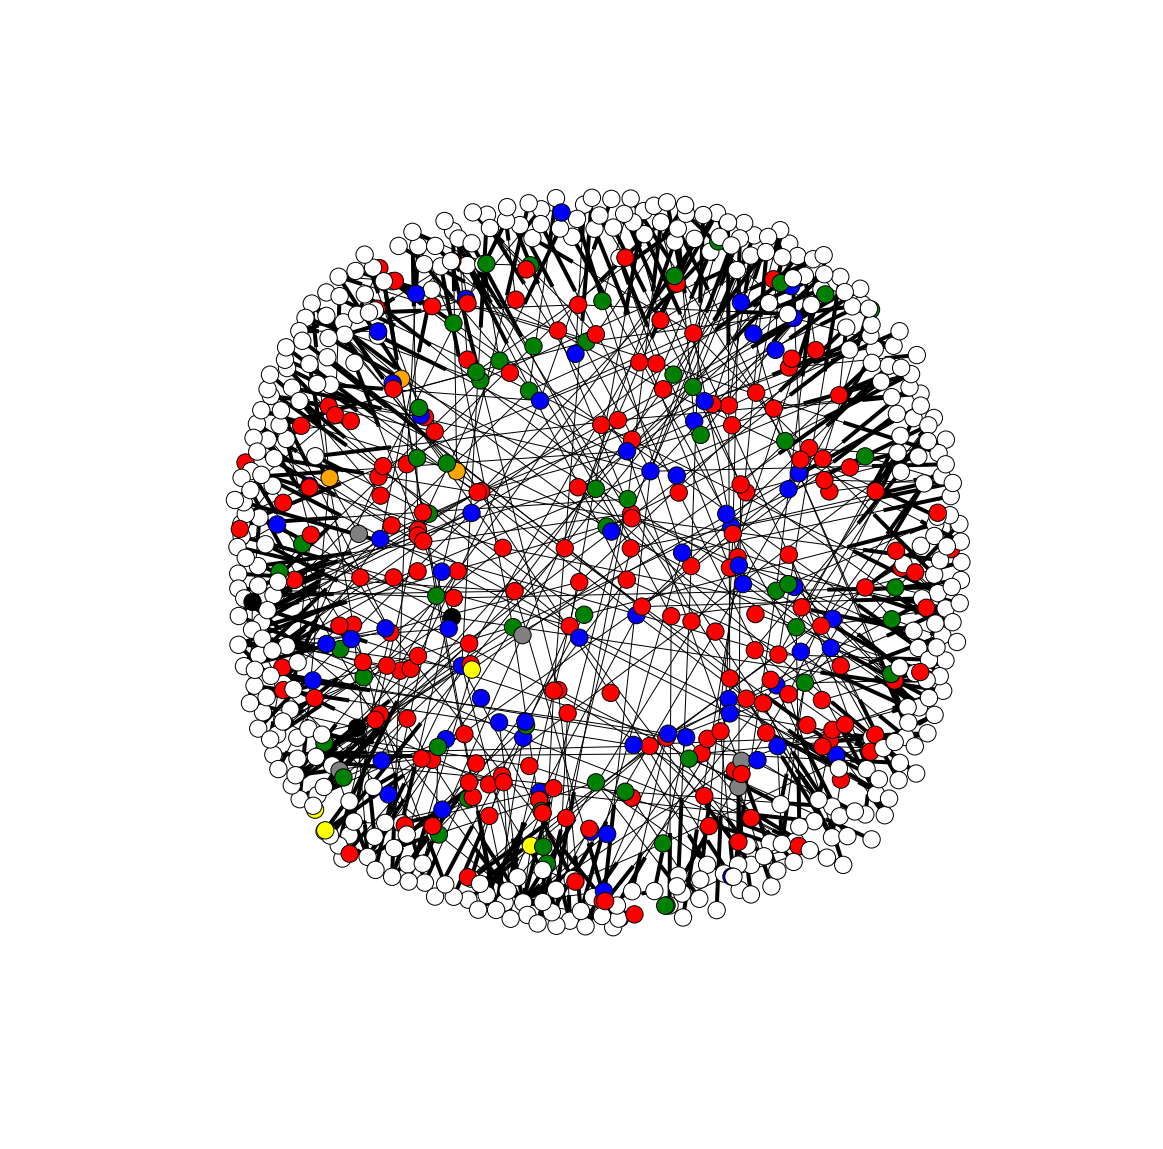

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20,20)

nx.draw(G, node_color=[G.node[x]['color'] for x in G.nodes_iter()], with_labels=False, ax=ax)
# nx.draw(S, ax=ax)
plt.show();

Graph Analysis
----

We can use some standard measures that assess how important a node is

* degree centrality: this measures to how many other nodes a node $u$ is connected

* betweenness centrality: this measures how often the node is part of a shortest path between other nodes

* Page Rank: this is the algortihm used by Google (and developed by one of its fonders, Larry Page). It takes into account how many nodes link to $u$ and how important those other nodes are.

We compute the values for each node and then enrich our graph by adding the information as another attribute to each node. Luckily, we don't have to do this explicitly for every node, but can do it in batch.

In [8]:
# compute PageRank
page_rank = nx.pagerank(G)
# set attribute for all nodes
nx.set_node_attributes(G, 'page_rank', page_rank)

# compute degree centrality
degree_centrality = nx.degree_centrality(G)
# set attribute for all nodes
nx.set_node_attributes(G, 'degree_centrality', degree_centrality)

# compute betweenness
betweenness = nx.betweenness_centrality(G)
# set attribute for all nodes
nx.set_node_attributes(G, 'betweenness', betweenness)

# find top ranked nodes
sorted_pr = sorted(page_rank.items(), key=operator.itemgetter(1), reverse=True)
sorted_degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse=True)

# print the most central nodes
for node_id, degree in sorted_degree_centrality[:5]:
    print(node_id, G.node[node_id])
print


AMAZE {'degree_centrality': 0.01483679525222552, 'POS': 'VERB', 'color': 'blue', 'page_rank': 0.0010606243012781453, 'betweenness': 0.0}
TO {'degree_centrality': 0.01483679525222552, 'POS': 'ASSOCIATION', 'color': 'white', 'page_rank': 0.007034704147615462, 'betweenness': 0.0}
ACCOMPLISHED {'degree_centrality': 0.013353115727002967, 'POS': 'VERB', 'color': 'blue', 'page_rank': 0.0010606243012781453, 'betweenness': 0.0}
ABLE {'degree_centrality': 0.010385756676557865, 'POS': 'ADJ', 'color': 'green', 'page_rank': 0.0010606243012781453, 'betweenness': 0.0}
ANCESTOR {'degree_centrality': 0.010385756676557865, 'POS': 'NOUN', 'color': 'red', 'page_rank': 0.0010606243012781453, 'betweenness': 0.0}


<function print>

Note that for a directed graph of this sort, betweenness is 0 for all nodes, since there are no path longer than 1.


## Exercise

Let's look at the top nodes and their connections. Find the 10 most central nodes and create a subgraph from them. Plot the subgraph and look at it. What can you say about the `AGE` and `ANCESTOR`?

In [9]:
# Your code here

Reading
====

* http://www.slideshare.net/arnicas/a-quick-and-dirty-intro-to-networkx-and-d3

* http://www.faculty.ucr.edu/~hanneman/nettext/